### Connect to Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/AN2DL/polimi-an2dl/lec1

Mounted at /content/drive
/content/drive/MyDrive/AN2DL/polimi-an2dl/lec1


### Import libraries

In [2]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [3]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.13.0


In [4]:
# Import other libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### Load Data

In [5]:
# Load the Iris dataset into a variable called 'data'
data = load_iris()

# Print the description of the Iris dataset
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

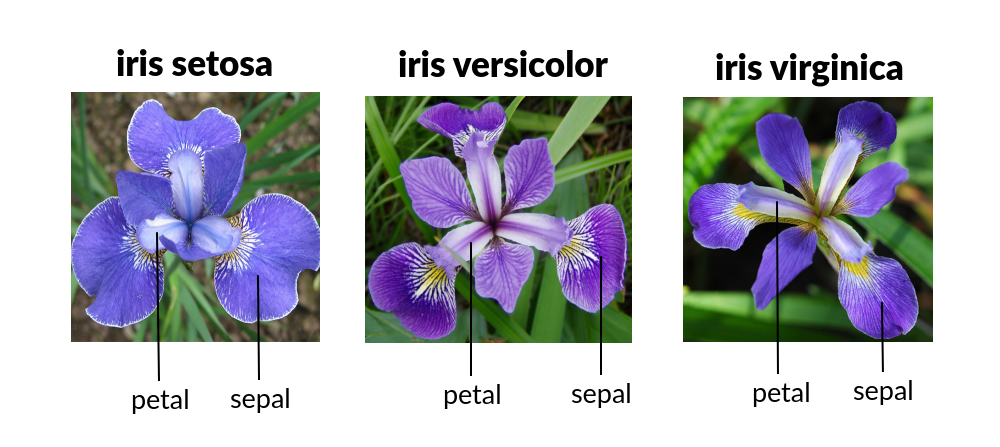

### Inspect data

In [7]:
# Create a DataFrame 'iris_dataset' from the Iris dataset
iris_dataset = pd.DataFrame(data.data, columns=data.feature_names)
print('Iris dataset shape', iris_dataset.shape)

# Display the first 10 rows of the Iris dataset
iris_dataset.head(10)

Iris dataset shape (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [8]:
# Generate summary statistics for the Iris dataset
iris_dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Get the target values from the Iris dataset
target = data.target
print('Target shape', target.shape)

# Calculate the unique target labels and their counts
unique, count = np.unique(target, return_counts=True)
print('Target labels:', unique)
for u in unique:
    print(f'Class {unique[u]} has {count[u]} samples')

Target shape (150,)
Target labels: [0 1 2]
Class 0 has 50 samples
Class 1 has 50 samples
Class 2 has 50 samples


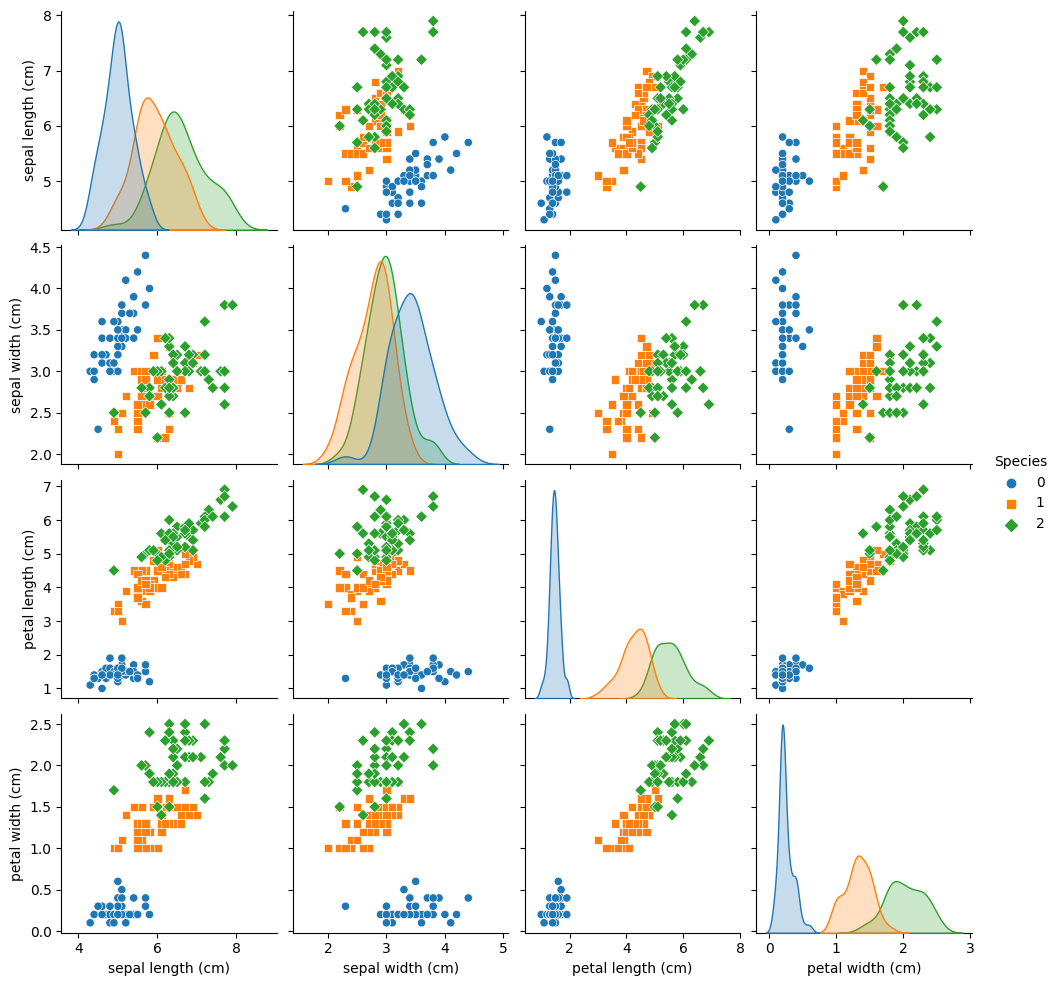

In [10]:
# Copy the iris dataset, assign target labels, and plot using seaborn
plot_dataset = iris_dataset.copy()
plot_dataset["Species"] = target
sns.pairplot(plot_dataset, hue="Species", palette="tab10", markers=["o", "s", "D"],)
plt.show()
del plot_dataset # Clean up

Split in train, validation and test

In [11]:
# Split the dataset into a combined training and validation set, and a separate test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    iris_dataset,
    target,
    test_size = 30,
    random_state = seed,
    stratify = target
)

# Further split the combined training and validation set into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size = 30,
    random_state = seed,
    stratify = y_train_val
)

# Print the shapes of the resulting sets
print('Training set shape:\t',X_train.shape, y_train.shape)
print('Validation set shape:\t',X_val.shape, y_val.shape)
print('Test set shape:\t\t',X_test.shape, y_test.shape)

Training set shape:	 (90, 4) (90,)
Validation set shape:	 (30, 4) (30,)
Test set shape:		 (30, 4) (30,)


### Process data

In [12]:
# Compute and store the maximum values for each feature in the training dataset
max_df = X_train.max()
print('Iris dataset maximum valus')
print(max_df)

# Compute and store the minimum values for each feature in the training dataset
min_df = X_train.min()
print('\nIris dataset minimum valus')
print(min_df)

Iris dataset maximum valus
sepal length (cm)    7.9
sepal width (cm)     3.9
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

Iris dataset minimum valus
sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.1
petal width (cm)     0.1
dtype: float64


In [13]:
# Normalise the dataset splits in the range [0,1]
X_train = (X_train - min_df)/(max_df - min_df)
X_val = (X_val - min_df)/(max_df - min_df)
X_test = (X_test - min_df)/(max_df - min_df)

In [14]:
# Inspect the effects of data normalisation
X_train.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,90.000000,90.000000,90.000000,90.000000
mean,0.426852,0.533333,0.457088,0.457407
std,0.240597,0.219104,0.305532,0.317200
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.381579,0.086207,0.083333
50%,0.402778,0.526316,0.543103,0.500000
75%,0.583333,0.631579,0.689655,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [15]:
# Transform labels via one-hot encoding
# i.e. 0 -> [1,0,0], 1 -> [0,1,0], 2 -> [0,0,1]
y_train = tfk.utils.to_categorical(y_train, num_classes=len(unique))
y_val = tfk.utils.to_categorical(y_val, num_classes=len(unique))
y_test = tfk.utils.to_categorical(y_test, num_classes=len(unique))

print('Training set target shape:\t',y_train.shape)
print('Validation set target shape:\t',y_val.shape)
print('Test set target shape:\t\t',y_test.shape)

Training set target shape:	 (90, 3)
Validation set target shape:	 (30, 3)
Test set target shape:		 (30, 3)


In [16]:
# Determine the input shape for the neural network,
# which corresponds to the number of features in the input data
input_shape = X_train.shape[1:]
print(f'Input shape of the network {input_shape}')

# Determine the output shape for the neural network,
# which corresponds to the number of classes in the classification task
output_shape = y_train.shape[1]
print(f'Output shape of the network {output_shape}')

Input shape of the network (4,)
Output shape of the network 3


In [17]:
# Define the batch size, which is the number of samples processed in each training iteration
batch_size = 16

# Define the number of training epochs,
# which is the number of times the entire dataset is passed through the network during training
epochs = 500

### Build the model

In [18]:
def build_model(
    input_shape,
    output_shape,
    seed=seed
):

    # Fix randomness
    tf.random.set_seed(seed)

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    hidden_layer = tfkl.Dense(units=128, name='Hidden')(input_layer)
    hidden_activation = tfkl.Activation('relu', name='HiddenActivation')(hidden_layer)

    output_layer = tfkl.Dense(units=output_shape, name='Output')(hidden_activation)
    output_activation = tfkl.Activation('softmax', name='Softmax')(output_layer)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_activation, name='Feedforward')

    # Compile the model
    loss = tfk.losses.CategoricalCrossentropy()
    learning_rate = 0.01
    optimizer = tfk.optimizers.SGD(learning_rate)
    metrics = ['Accuracy']
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    # Return the model
    return model

Model: "Feedforward"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 4)]               0         
                                                                 
 Hidden (Dense)              (None, 128)               640       
                                                                 
 HiddenActivation (Activati  (None, 128)               0         
 on)                                                             
                                                                 
 Output (Dense)              (None, 3)                 387       
                                                                 
 Softmax (Activation)        (None, 3)                 0         
                                                                 
Total params: 1027 (4.01 KB)
Trainable params: 1027 (4.01 KB)
Non-trainable params: 0 (0.00 Byte)
_______________________

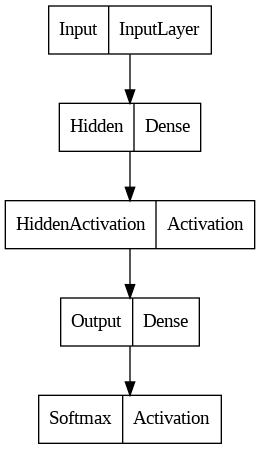

In [19]:
model = build_model(input_shape, output_shape)
model.summary()
tfk.utils.plot_model(model)

### Train the model

In [20]:
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (X_val, y_val)
).history

Epoch 1/500
6/6 [==============================] - 2s 221ms/step - loss: 1.1163 - Accuracy: 0.3333 - val_loss: 1.0951 - val_Accuracy: 0.3333
Epoch 2/500
6/6 [==============================] - 0s 48ms/step - loss: 1.1007 - Accuracy: 0.3333 - val_loss: 1.0792 - val_Accuracy: 0.3667
Epoch 3/500
6/6 [==============================] - 0s 35ms/step - loss: 1.0858 - Accuracy: 0.3444 - val_loss: 1.0647 - val_Accuracy: 0.4333
Epoch 4/500
6/6 [==============================] - 0s 27ms/step - loss: 1.0722 - Accuracy: 0.4222 - val_loss: 1.0519 - val_Accuracy: 0.5000
Epoch 5/500
6/6 [==============================] - 0s 37ms/step - loss: 1.0598 - Accuracy: 0.5667 - val_loss: 1.0397 - val_Accuracy: 0.5333
Epoch 6/500
6/6 [==============================] - 0s 24ms/step - loss: 1.0481 - Accuracy: 0.6111 - val_loss: 1.0285 - val_Accuracy: 0.6333
Epoch 7/500
6/6 [==============================] - 0s 29ms/step - loss: 1.0374 - Accuracy: 0.6556 - val_loss: 1.0174 - val_Accuracy: 0.6667
Epoch 8/500
6/6 [==

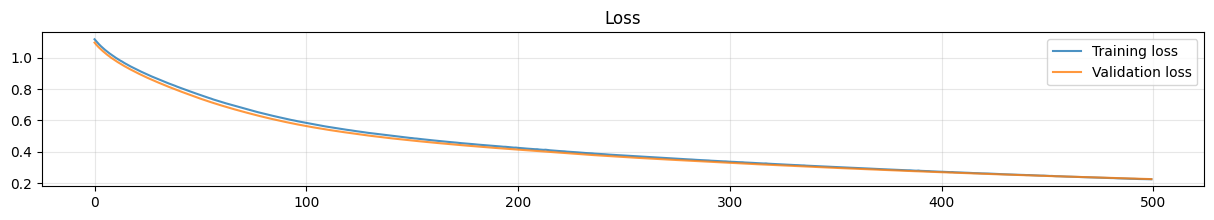

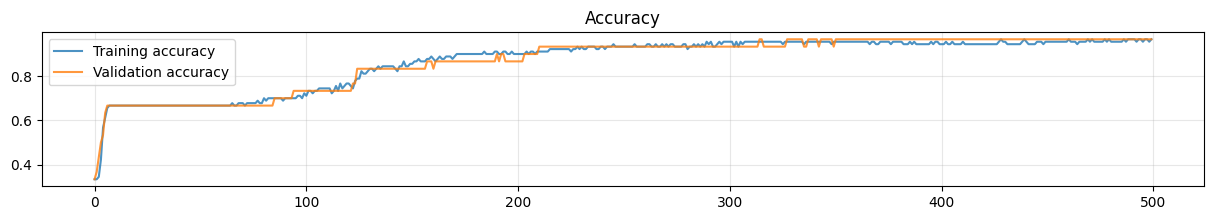

In [21]:
# Create and display plots for training and validation loss
plt.figure(figsize=(15,2))
plt.plot(history['loss'], label='Training loss', alpha=.8)
plt.plot(history['val_loss'], label='Validation loss', alpha=.8)
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

# Create and display plots for training and validation accuracy
plt.figure(figsize=(15,2))
plt.plot(history['Accuracy'], label='Training accuracy', alpha=.8)
plt.plot(history['val_Accuracy'], label='Validation accuracy', alpha=.8)
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [22]:
# Save the trained model
model.save('Iris_Feedforward')

In [23]:
# Delete and load the model
del model

In [24]:
model = tfk.models.load_model('Iris_Feedforward')
model.summary()

Model: "Feedforward"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 4)]               0         
                                                                 
 Hidden (Dense)              (None, 128)               640       
                                                                 
 HiddenActivation (Activati  (None, 128)               0         
 on)                                                             
                                                                 
 Output (Dense)              (None, 3)                 387       
                                                                 
 Softmax (Activation)        (None, 3)                 0         
                                                                 
Total params: 1027 (4.01 KB)
Trainable params: 1027 (4.01 KB)
Non-trainable params: 0 (0.00 Byte)
_______________________

### Make inference

In [25]:
# Training set prediction
train_predictions = model.predict(X_train, verbose=0)
train_predictions = np.argmax(train_predictions,axis=-1)

train_gt = np.argmax(y_train,axis=-1)

train_accuracy = accuracy_score(train_gt, train_predictions)
print(f'Accuracy score over the train set: {round(train_accuracy,4)}')

Accuracy score over the train set: 0.9667


In [26]:
# Validation set prediction
val_predictions = model.predict(X_val, verbose=0)
val_predictions = np.argmax(val_predictions, axis=-1)

val_gt = np.argmax(y_val, axis=-1)

val_accuracy = accuracy_score(val_gt, val_predictions)
print(f'Accuracy score over the validation set: {round(val_accuracy, 4)}')

Accuracy score over the validation set: 0.9667


In [27]:
# Test set prediction
test_predictions = model.predict(X_test, verbose=0)
test_predictions = np.argmax(test_predictions, axis=-1)

test_gt = np.argmax(y_test, axis=-1)

test_accuracy = accuracy_score(test_gt, test_predictions)
print(f'Accuracy score over the test set: {round(test_accuracy, 4)}')

Accuracy score over the test set: 0.9333


### TODO Exercise
Perform the same classification analysis on the Penguins dataset to predict the correct species

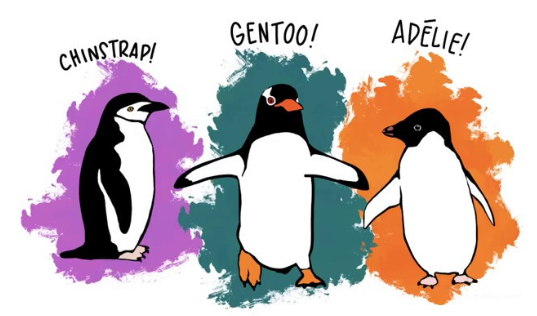

```
# Load data
dataset = pd.read_csv('penguins.csv')

# Inspect data
...

# Clean data (How to handle missing values?)
...

# Process data (How to manage categorical columns?)
...

# Build the model
...

# Train the model
...

# Make inferece
...

```



In [236]:
dataset = pd.read_csv('penguins.csv')
dataset

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [237]:
dataset.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [238]:
# Handle categorical sex column

dataset['sex'][dataset['sex'] == 'MALE'] = 0
dataset['sex'][dataset['sex'] == 'FEMALE'] = 1

In [239]:
dataset[dataset.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [240]:
df = dataset.copy()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1


In [241]:
valid_indices = df['body_mass_g'].notna()
df = df[valid_indices]
print(f"Dropped {len(dataset) - len(df)} rows.")
df.head()

Dropped 2 rows.


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0


In [242]:
target = df['species']
# Get the target values from the Penguins dataset
print('Target shape', target.shape)

# Calculate the unique target labels and their counts
unique, count = np.unique(target, return_counts=True)
print('Target labels:', unique)
for i, u in enumerate(unique):
    print(f'Class {u} has {count[i]} samples')

df = df.loc[:, df.columns!='species']

Target shape (342,)
Target labels: ['Adelie' 'Chinstrap' 'Gentoo']
Class Adelie has 151 samples
Class Chinstrap has 68 samples
Class Gentoo has 123 samples


In [243]:
new_nans = df.isna().any(axis=1)

In [244]:
df[new_nans]

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
8,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Dream,37.5,18.9,179.0,2975.0,NaN
246,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [245]:
df.ffill(inplace=True)

In [246]:
old_nans = new_nans
new_nans = df.isna().any(axis=1)

In [247]:
df[new_nans] # should be empty

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


In [248]:
df.isna().any() # All NaNs have been handled

island               False
bill_length_mm       False
bill_depth_mm        False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

In [249]:
df.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,0
1,Torgersen,39.5,17.4,186.0,3800.0,1
2,Torgersen,40.3,18.0,195.0,3250.0,1
4,Torgersen,36.7,19.3,193.0,3450.0,1
5,Torgersen,39.3,20.6,190.0,3650.0,0


In [250]:
# Split the dataset into a combined training and validation set, and a separate test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    df,
    target,
    test_size = 30,
    random_state = seed,
    stratify = target
)

# Further split the combined training and validation set into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size = 30,
    random_state = seed,
    stratify = y_train_val
)

# Print the shapes of the resulting sets
print('Training set shape:\t',X_train.shape, y_train.shape)
print('Validation set shape:\t',X_val.shape, y_val.shape)
print('Test set shape:\t\t',X_test.shape, y_test.shape)

Training set shape:	 (282, 6) (282,)
Validation set shape:	 (30, 6) (30,)
Test set shape:		 (30, 6) (30,)


In [251]:
X_train['island'] = pd.Categorical(X_train['island'])

In [252]:
X_val['island'] = pd.Categorical(X_val['island'])

In [253]:
X_test['island'] = pd.Categorical(X_test['island'])

In [254]:
X_train_num = df.select_dtypes(include='number')
X_val_num = df.select_dtypes(include='number')
X_test_num = df.select_dtypes(include='number')

In [255]:
# Compute and store the maximum values for each feature in the training dataset
max_df = X_train_num.max()
print('Penguin dataset maximum valus')
print(max_df)

# Compute and store the minimum values for each feature in the training dataset
min_df = X_train_num.min()
print('\nPenguin dataset minimum valus')
print(min_df)

Penguin dataset maximum valus
bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
sex                     1.0
dtype: float64

Penguin dataset minimum valus
bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
sex                     0.0
dtype: float64


In [256]:
# Normalise the dataset splits in the range [0,1]
X_train_num = (X_train_num - min_df)/(max_df - min_df)
X_val_num = (X_val_num - min_df)/(max_df - min_df)
X_test_num = (X_test_num - min_df)/(max_df - min_df)

In [257]:
X_train[X_train_num.columns] = X_train_num
X_val[X_val_num.columns] = X_val_num
X_test[X_test_num.columns] = X_test_num

In [258]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le = le.fit(X_train['island'])
X_train['island'] = le.transform(X_train['island'])
X_val['island'] = le.transform(X_val['island'])
X_test['island'] = le.transform(X_test['island'])


In [259]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

In [260]:
# Transform labels via one-hot encoding
# i.e. 0 -> [1,0,0], 1 -> [0,1,0], 2 -> [0,0,1]
y_train = tfk.utils.to_categorical(y_train, num_classes=len(unique))
y_val = tfk.utils.to_categorical(y_val, num_classes=len(unique))
y_test = tfk.utils.to_categorical(y_test, num_classes=len(unique))

print('Training set target shape:\t',y_train.shape)
print('Validation set target shape:\t',y_val.shape)
print('Test set target shape:\t\t',y_test.shape)

Training set target shape:	 (282, 3)
Validation set target shape:	 (30, 3)
Test set target shape:		 (30, 3)


In [261]:
# Determine the input shape for the neural network,
# which corresponds to the number of features in the input data
input_shape = X_train.shape[1:]
print(f'Input shape of the network {input_shape}')

# Determine the output shape for the neural network,
# which corresponds to the number of classes in the classification task
output_shape = y_train.shape[1]
print(f'Output shape of the network {output_shape}')

Input shape of the network (6,)
Output shape of the network 3


Model: "Feedforward"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 6)]               0         
                                                                 
 Hidden (Dense)              (None, 128)               896       
                                                                 
 HiddenActivation (Activati  (None, 128)               0         
 on)                                                             
                                                                 
 Output (Dense)              (None, 3)                 387       
                                                                 
 Softmax (Activation)        (None, 3)                 0         
                                                                 
Total params: 1283 (5.01 KB)
Trainable params: 1283 (5.01 KB)
Non-trainable params: 0 (0.00 Byte)
_______________________

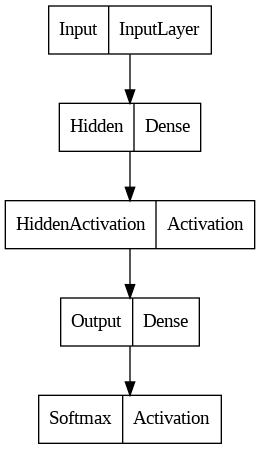

In [262]:
model = build_model(input_shape, output_shape)
model.summary()
tfk.utils.plot_model(model)

In [263]:
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (X_val, y_val)
).history

Epoch 1/500
18/18 [==============================] - 2s 56ms/step - loss: 1.0736 - Accuracy: 0.4007 - val_loss: 1.0387 - val_Accuracy: 0.5000
Epoch 2/500
18/18 [==============================] - 0s 17ms/step - loss: 1.0160 - Accuracy: 0.6986 - val_loss: 0.9794 - val_Accuracy: 0.7667
Epoch 3/500
18/18 [==============================] - 0s 11ms/step - loss: 0.9681 - Accuracy: 0.7199 - val_loss: 0.9289 - val_Accuracy: 0.7667
Epoch 4/500
18/18 [==============================] - 0s 4ms/step - loss: 0.9270 - Accuracy: 0.7376 - val_loss: 0.8872 - val_Accuracy: 0.7667
Epoch 5/500
18/18 [==============================] - 0s 5ms/step - loss: 0.8930 - Accuracy: 0.7376 - val_loss: 0.8519 - val_Accuracy: 0.7333
Epoch 6/500
18/18 [==============================] - 0s 4ms/step - loss: 0.8629 - Accuracy: 0.7482 - val_loss: 0.8207 - val_Accuracy: 0.7333
Epoch 7/500
18/18 [==============================] - 0s 7ms/step - loss: 0.8350 - Accuracy: 0.7340 - val_loss: 0.7918 - val_Accuracy: 0.7333
Epoch 8/50

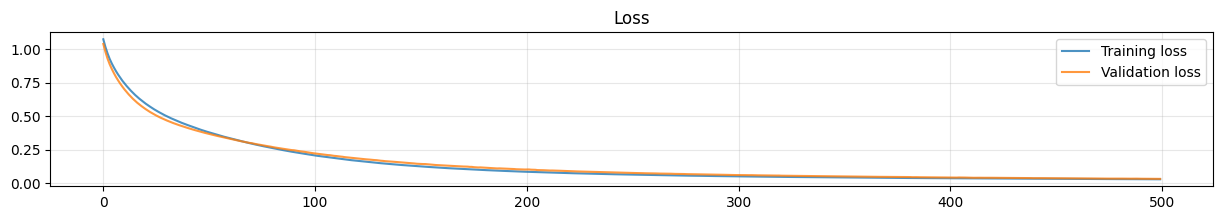

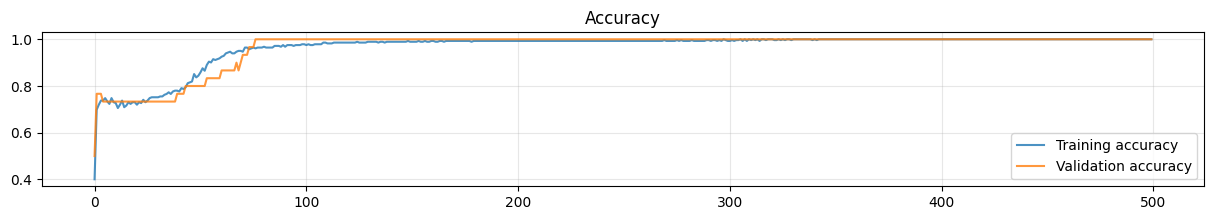

In [264]:
# Create and display plots for training and validation loss
plt.figure(figsize=(15,2))
plt.plot(history['loss'], label='Training loss', alpha=.8)
plt.plot(history['val_loss'], label='Validation loss', alpha=.8)
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

# Create and display plots for training and validation accuracy
plt.figure(figsize=(15,2))
plt.plot(history['Accuracy'], label='Training accuracy', alpha=.8)
plt.plot(history['val_Accuracy'], label='Validation accuracy', alpha=.8)
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [265]:
# Training set prediction
train_predictions = model.predict(X_train, verbose=0)
train_predictions = np.argmax(train_predictions,axis=-1)

train_gt = np.argmax(y_train,axis=-1)

train_accuracy = accuracy_score(train_gt, train_predictions)
print(f'Accuracy score over the train set: {round(train_accuracy,4)}')

Accuracy score over the train set: 1.0


In [ ]:
# Validation set prediction
val_predictions = model.predict(X_val, verbose=0)
val_predictions = np.argmax(val_predictions, axis=-1)

val_gt = np.argmax(y_val, axis=-1)

val_accuracy = accuracy_score(val_gt, val_predictions)
print(f'Accuracy score over the validation set: {round(val_accuracy, 4)}')

*Credits: Eugenio Lomurno, 📧 eugenio.lomurno@polimi.it*